In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime

In [165]:
df = pd.read_csv("/Users/howardchen/Desktop/伊雲谷/Topic/taiwan_data.csv")

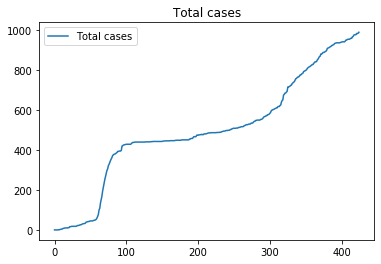

In [166]:
df[['Total cases']].plot()
plt.title("Total cases")
plt.show()

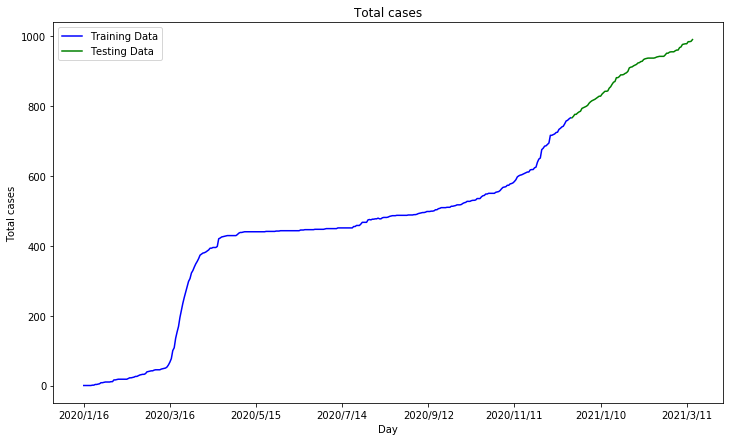

In [178]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Total cases')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.plot(train_data['Total cases'], 'blue', label='Training Data')
plt.plot(test_data['Total cases'], 'green', label='Testing Data')
plt.xticks(np.arange(0,425,60), df['Day'][0:425:60])
plt.legend()

In [179]:
train_ar = train_data['Total cases'].values
test_ar = test_data['Total cases'].values
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 6.550
Symmetric mean absolute percentage error: 8.381


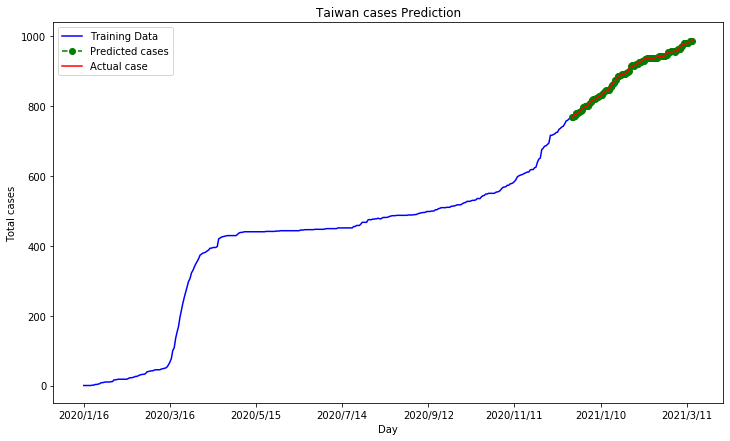

In [180]:
plt.figure(figsize=(12,7))
plt.plot(df['Total cases'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted cases')
plt.plot(test_data.index, test_data['Total cases'], color='red', label='Actual case')
plt.title('Taiwan cases Prediction')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.xticks(np.arange(0,425, 60), df['Day'][0:425:60])
plt.legend()

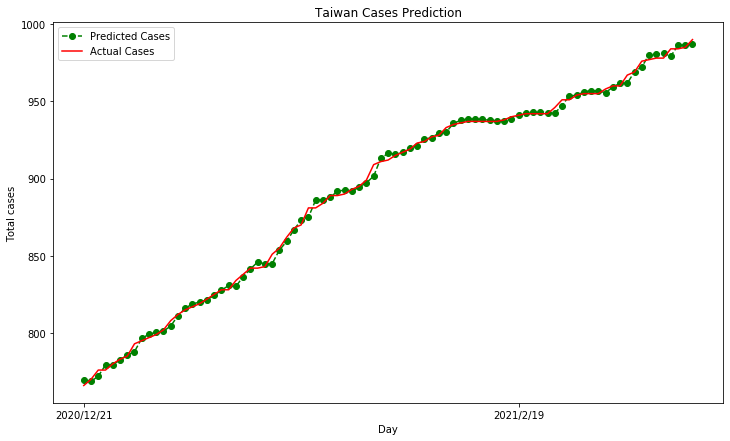

In [182]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Cases')
plt.plot(test_data.index, test_data['Total cases'], color='red', label='Actual Cases')
plt.xticks(np.arange(340,425, 60), df['Day'][340:425:60])
plt.title('Taiwan Cases Prediction')
plt.xlabel('Day')
plt.ylabel('Total cases')
plt.legend()